From Chapter 3 in Euan Sinclair and Andrew Mack's *Retail Options Trading*

In [184]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import patsy
import statsmodels.api as sm

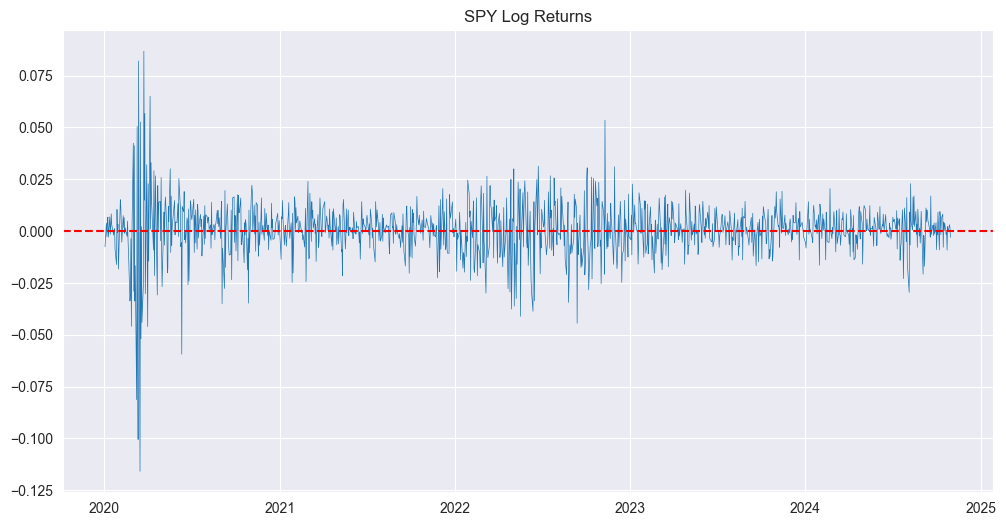

In [185]:
plt.figure(figsize=(12, 6))
spy_tk = yf.Ticker('SPY')
spy_df = spy_tk.history(start='2020-1-1',  end='2024-10-31', interval='1d')[['Open','High', 'Low','Close', 'Volume']]
spy_df.index = spy_df.index.date
spy_df['log_ret'] = np.log(spy_df.Close) - np.log(spy_df.Close.shift(1))
spy_df['ret'] = spy_df.Close / spy_df.Close.shift(1) - 1
#plt.plot(spy_df['Close'].rolling(window=100).mean());

plt.plot(spy_df['log_ret'], linewidth=0.5)
plt.title('SPY Log Returns')
plt.axhline(y=0.0, color='r', linestyle='--');

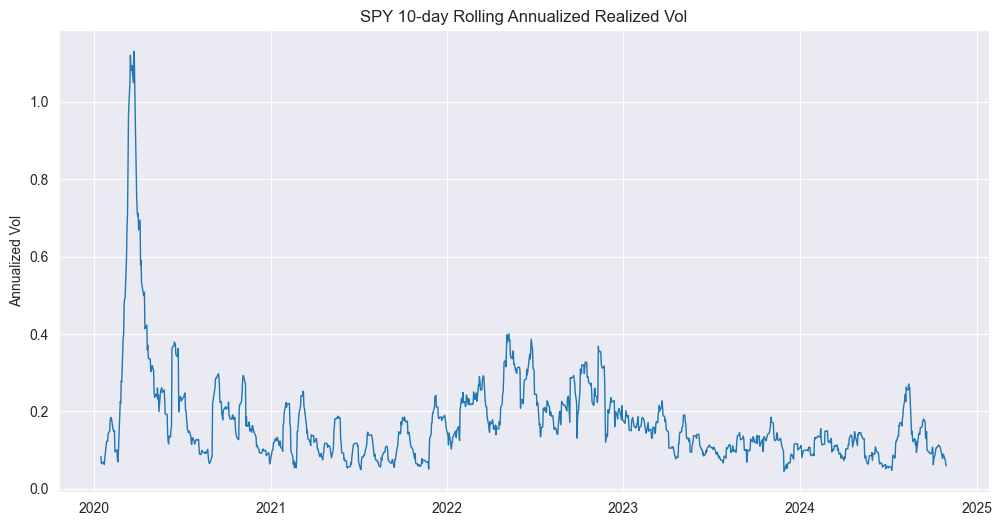

In [186]:
plt.figure(figsize=(12, 6))
spy_df['rolling_realized'] = spy_df['log_ret']23
plt.title('SPY 10-day Rolling Annualized Realized Vol')
plt.ylabel('Annualized Vol')
plt.plot(spy_df['rolling_realized'], linewidth=1);

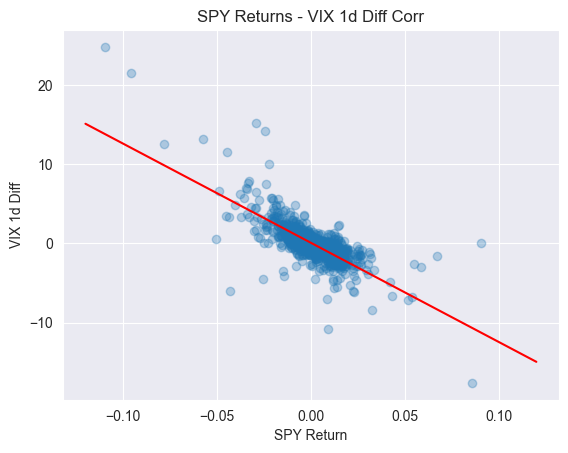

In [187]:
vix_tk = yf.Ticker('^VIX')
vix_df = vix_tk.history(start='2020-1-1',  end='2024-10-31', interval='1d')
vix_df.index = vix_df.index.date
vix_df['vix_1d_diff'] = vix_df.Close - vix_df.Close.shift(1)
spy_df['vix_1d_diff'] = vix_df['vix_1d_diff']
spy_df['vix_close'] = vix_df.Close
spy_df['vix_ret'] = spy_df.vix_close / spy_df.vix_close.shift(1) - 1

rhs = 'vix_1d_diff ~ ret'
y, X = patsy.dmatrices(rhs, spy_df)

linear_model = sm.OLS(y, X)  # Specify the model
results = linear_model.fit().params 

x = np.linspace(-0.12, 0.12, 2)
plt.plot(x, results[0] + results[1] * x, 'r')
plt.scatter(spy_df['ret'], spy_df['vix_1d_diff'], alpha=0.3)

plt.title('SPY Returns - VIX 1d Diff Corr')
plt.xlabel('SPY Return')
plt.ylabel('VIX 1d Diff');

In [188]:
spy_df.ret.corr(spy_df['vix_1d_diff']) 

-0.755727837737726

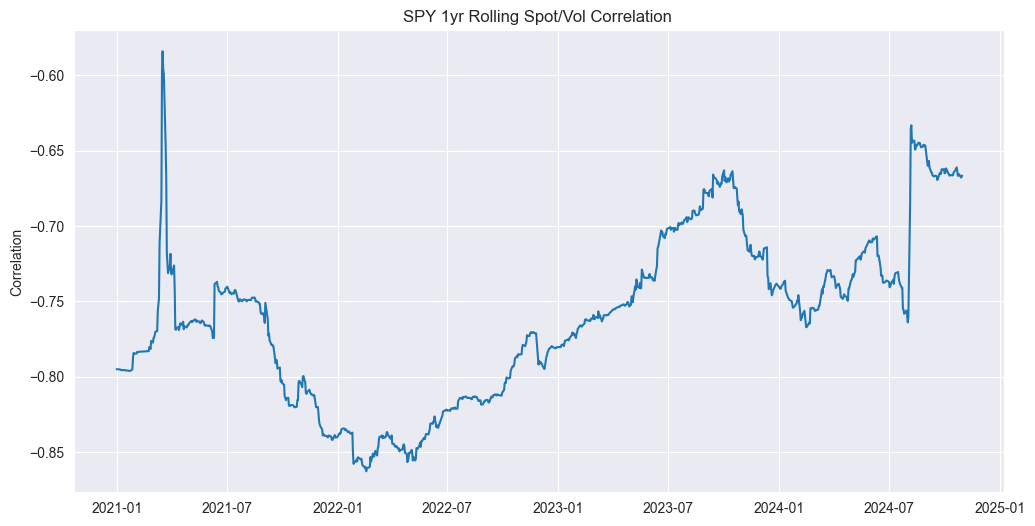

In [189]:
plt.figure(figsize=(12, 6))
plt.plot(spy_df['vix_1d_diff'].rolling(252).corr(spy_df['log_ret']))
plt.title('SPY 1yr Rolling Spot/Vol Correlation ')
plt.ylabel('Correlation');

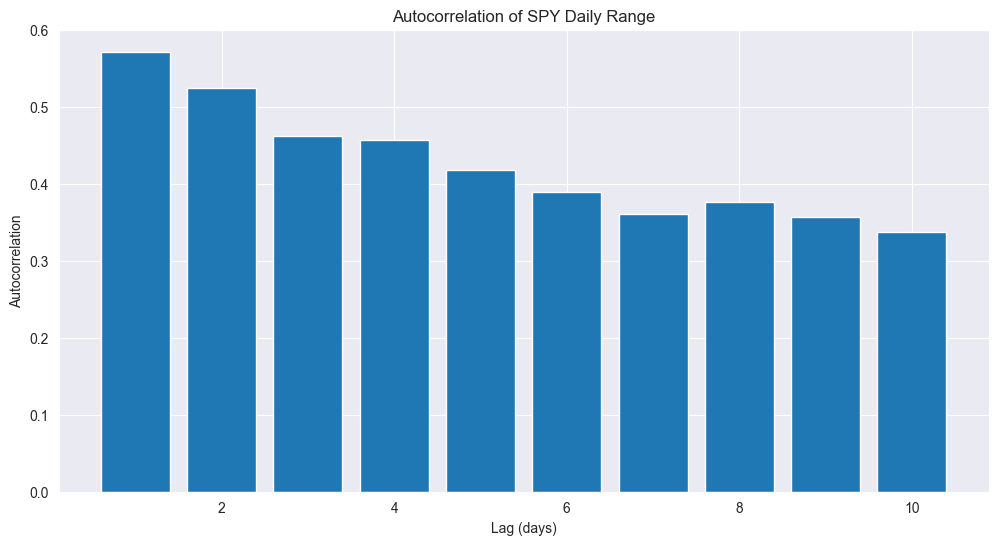

In [190]:
spy_df['daily_range'] = spy_df.High - spy_df.Low

lags = range(1, 11)
autocorr_values = [spy_df['daily_range'].autocorr(i) for i in lags]

plt.figure(figsize=(12, 6))
plt.bar(lags, autocorr_values)
plt.title('Autocorrelation of SPY Daily Range')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation');

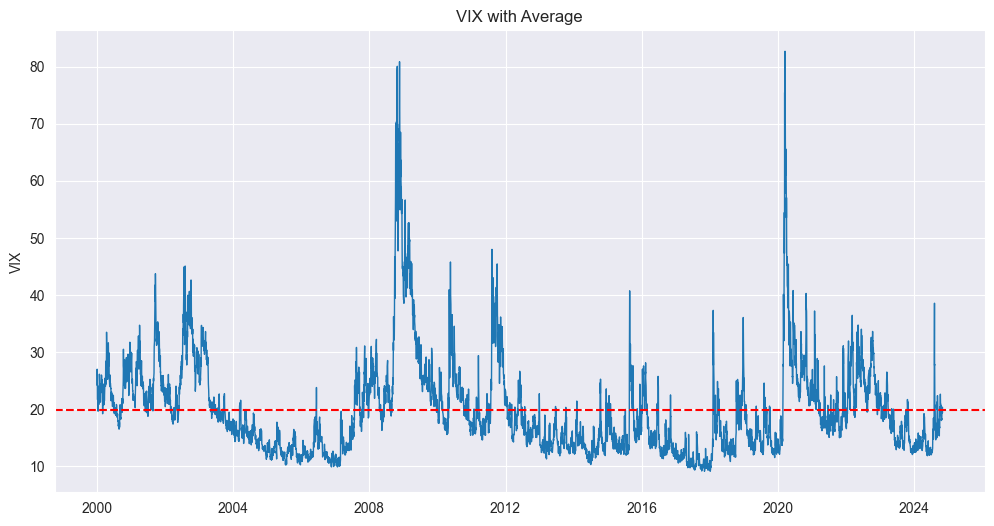

In [191]:
vix_y2k_tk = yf.Ticker('^VIX')
vix_y2k_df = vix_y2k_tk.history(start='2000-1-1',  end='2024-10-31', interval='1d')
vix_y2k_df.index = vix_y2k_df.index.date

vix_mu = vix_y2k_df.Close.mean()

plt.figure(figsize=(12, 6))
plt.plot(vix_y2k_df.Close, linewidth=1)
plt.axhline(y=vix_mu, color='r', linestyle='--')

plt.title('VIX with Average')
plt.ylabel('VIX');